In [148]:
#import necessary libraries
import pandas as pd
import nltk
import sys # needed this for certain print options during debugging
import numpy as np #lmao why did we not have this before
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/soumyankar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#load the dataset
pd.set_option('display.max_colwidth', None)
data = pd.read_csv('Steam Game Review.csv')
data.head(2)

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,"I'm scared and hearing creepy voices. So I'll pause for a moment and write a review while I wait for my heart beat to return to atleast somewhat calmer times. This game is adorable and creepy like my happy tree friends but with the graphics sceme of my childhood (but more bubble and 'clean'). Hello 1990's.What charactes there are (that isnot trying to kill me) were likable and a bit odd. I did do a few noob things though, such as:Oh look a class room full of ghosts from dead children, lets shine my flashlight on them and stand there staring at them..Or, hmm creepy music, I'll turn around and see if I can see what's chasing me.Never before in a game have I been this afraid of finding a locked door.",1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTube account. 10/10What you'll need to play:A computerSome extra pants.Pros:Scary as hell.Fun.Adventure.Spooky.Did I forgot to mention that its scary as hell?You'll get more pants/briefs in your wardrobe.Time consuming if you're bored.Cons:Buying pants/briefs. You haven't downloaded it yet.",1


In [3]:
#dataset facts
data.shape

(17494, 5)

In [4]:
#dataset facts
data['user_suggestion'].value_counts()

1    9968
0    7526
Name: user_suggestion, dtype: int64

In [5]:
#dataset facts
data['title'].nunique()

44

In [20]:
# Data processing for removing stop words, lemmatization and stemmming, and english-only.
# Importing all relevant libraries and functions here
import spacy #load spacy
from sklearn.pipeline import Pipeline # pipelining pre-processing
from spacy.lang.en import English
nlp = spacy.load("en_core_web_sm")
tokenizer = nlp.tokenizer

In [21]:
#tokenization
def create_tokenized_dataset(data):
    tokens_list = []

    for j in data['user_review']:
#         tokens_list.append(word_tokenize(j))
        spacy_tokens = [token.orth_ for token in tokenizer(j)]
        tokens_list.append(spacy_tokens)
    data['Tokens'] = tokens_list   
    return data

df = create_tokenized_dataset(data)
df.head(1)

,review_id,title,year,user_review,user_suggestion,Tokens,ProcessTokens
0,1,Spooky's Jump Scare Mansion,2016.0,"I'm scared and hearing creepy voices. So I'll pause for a moment and write a review while I wait for my heart beat to return to atleast somewhat calmer times. This game is adorable and creepy like my happy tree friends but with the graphics sceme of my childhood (but more bubble and 'clean'). Hello 1990's.What charactes there are (that isnot trying to kill me) were likable and a bit odd. I did do a few noob things though, such as:Oh look a class room full of ghosts from dead children, lets shine my flashlight on them and stand there staring at them..Or, hmm creepy music, I'll turn around and see if I can see what's chasing me.Never before in a game have I been this afraid of finding a locked door.",1,"[I, 'm, scared, and, hearing, creepy, voices, ., , So, I, 'll, pause, for, a, moment, and, write, a, review, while, I, wait, for, my, heart, beat, to, return, to, atleast, somewhat, calmer, times, ., , This, game, is, adorable, and, creepy, like, my, happy, tree, friends, but, with, the, graphics, sceme, of, my, childhood, (, but, more, bubble, and, ', clean, ', ), ., , Hello, 1990's, ., What, charactes, there, are, (, that, isnot, trying, to, kill, me, ), were, likable, and, a, bit, odd, ., , I, did, do, a, few, noob, things, though, ,, such, as, ...]","[scared, hearing, creepy, voice, pause, moment, write, review, wait, heart, beat, return, atleast, somewhat, calmer, time, game, adorable, creepy, like, happy, tree, friend, graphic, sceme, childhood, bubble, 'clean, hello, 1990's.what, charactes, isnot, trying, kill, likable, bit, odd, noob, thing, though, oh, look, class, room, full, ghost, dead, child, let, shine, flashlight, stand, staring, .., hmm, creepy, music, turn, around, see, see, chasing, me.never, game, afraid, finding, locked, door]"


In [22]:
#define lemmatizer
lemmatizer = WordNetLemmatizer()

In [23]:
#define stopwords
stopWords = set(stopwords.words('english'))
custom_stop = ["'m", "'ll", "'s", "'re", "n't", "'ve"]
stop_words = set(list(stopWords) + custom_stop)

In [57]:
#define punctuation
custom_punc = ["``", "''", "--", "...","♥"]
punctuation = set(list(string.punctuation) + custom_punc)

In [62]:
# nltk for removing english words
nltk.download('words')
words = set(nltk.corpus.words.words())

9829


[nltk_data] Downloading package words to
[nltk_data]     /Users/soumyankar/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [86]:
#data preprocessing: define functions

# created a function to deal with that pesky steam heart emoticon
# print(ord('♥'))
def remove_steam_heart(tokens):
    for token in tokens:
        if len(token) == 1:
            if(ord(token) == 9829): # 9829 is the unicode for the heart emoticon
                tokens.remove(token)
    return tokens

#lower case
def lower_case(tokens):
    tokens = [token.lower() for token in tokens]
    return tokens

#remove stopwords
def remove_stopwords(tokens):
#     tokens = [token for token in tokens if token not in stop_words]
# Using the spacy stop words set instead of the english stop words
    tokens = [token for token in tokens if token not in nlp.Defaults.stop_words]
    return tokens

#remove digits
def remove_digits(tokens):
    for token in tokens:
        if token.isdigit():
            tokens.remove(token)
    return tokens

#remove punctuation
def remove_punctuation(tokens):
    tokens = [token for token in tokens if token not in punctuation]
    return tokens

#lemmatization
def lemmatize_words(tokens):
    for token in range(len(tokens)):
        tokens[token] = lemmatizer.lemmatize(tokens[token])
    return tokens

# Using nltk to word corpus to remove non-english words
# this method seemed cheaper and easier than spacy? maybe lol
def remove_non_english(tokens):
    tokens = [token for token in tokens if token in words]
    return tokens

In [87]:
#data preprocessing function
def data_preprocess(tokens):
    new_tokens = lower_case(tokens)
    new_tokens = remove_steam_heart(new_tokens)
    new_tokens = remove_non_english(new_tokens)
    new_tokens = remove_stopwords(new_tokens)
    new_tokens = remove_digits(new_tokens)
    new_tokens = remove_punctuation(new_tokens)
    new_tokens = lemmatize_words(new_tokens)
    return new_tokens
    
list_of_process_tokens = []
for i in df['Tokens']:
    list_of_process_tokens.append(data_preprocess(i))

In [88]:
df['ProcessTokens'] = list_of_process_tokens    
df.sample(20)

,review_id,title,year,user_review,user_suggestion,Tokens,ProcessTokens
16605,24574,Bloons TD Battles,2018.0,"Counted six microtransactions simultaneously, excluding 66% of the tower upgrades(fun ones are locked for every singel tower) which you might get one day, but until then, the p2w opponent have a tower(p2w only) that shoots at your health bar sooo... rip me ever geting the most basic banana farm T-Tpay up , or have a broken experience.",0,"[Counted, six, microtransactions, simultaneously, ,, excluding, 66, %, of, the, tower, upgrades(fun, ones, are, locked, for, every, singel, tower, ), which, you, might, get, one, day, ,, but, until, then, ,, the, p2w, opponent, have, a, tower(p2w, only, ), that, shoots, at, your, health, bar, sooo, ..., rip, me, ever, geting, the, most, basic, banana, farm, , T, -, Tpay, up, ,, or, have, a, broken, experience, .]","[simultaneously, excluding, tower, locked, tower, day, opponent, health, bar, rip, basic, banana, farm, t, broken, experience]"
8942,11952,PlanetSide 2,2013.0,"Oh, Planetside 2. How glorious you are. Massive 2,000 player servers, spread across 3 different continents and across 3 warring factions, oh glory be.Being a F2P game (free to play), you don't have a reason to at least not try the game out. That is if your computer can handle it. Previously, the game was extremely poorly optimized for AMD CPU's, and t hat has recently changed. Where i was once getting 12 frames in large Biodome fights, I'm now giving it 45 bonus points.Now, the game is an infantry-vehicular combat game. The 3 factions fight over different facilities across each continent that provide different passive boosts to weapon and item costs and resource gains. Every time you purchase a grenade for your soldier, you use infantry resources, same goes with C4, personal med-kits and the highly useful and badass MAX suits. Vehicles take the apropriate resources as well and depending upon what you attach to it, cost more.Now, the three factions are all similar yet very different, both aesthetically and performance wise. the New Conglomerate have slower firing more powerful older type weapons while the Vannu Sovereignty have laser weapons with perfect accuracy, no bullet drop but dow low damage. Each faction has a shared few vehicles and their own fighter plane, heavy tank and different weapons for each shared vehicle as well.Now, Planetside 2 is a free-to-play title, but don't let that scare you away. Most games have a pay-to-win model to be more precise, whre as long as you just dump money into the game, you will have much improved gear over others, and this is why most F2P games fail, but not PS2. The only thing real money is good for in PS2 is purchasing a subscription which gives you an allowence of 500 SC (station cash) per month and an XP and Cert bonus. Certs are what is used to unlock weapons and attachments while SC is used to purchase weapons skipping the arning of certs as well as customization options such as camos, helmets, and emblems on your soldier and vehicles.YOu can not buy certs outright, which is where the balancing is. Each weapoin can be moddified heavily with weapoin attatchments which alter their performance drastically from 1x red dot sights to 20x sniper rifle scopes or silencers or weapon grips. It all depends. These are purchased using certs. You earn 1 cert per 1000 xp in game. While the weapon may be bought with SC and skip the 1000 cert price point, the attachments must be earned through play.I know this review is all over the place, but if you like FPS's on a massive scale, skip that Battlefield 4 64 player nonsense and jump right inot an amazing free game, Planetside 2.",1,"[Oh, ,, Planetside, 2, ., How, glorious, you, are, ., Massive, 2,000, player, servers, ,, spread, across, 3, different, continents, and, across, 3, warring, factions, ,, oh, glory, be, ., Being, a, F2P, game, (, free, to, play, ), ,, you, do, n't, have, a, reason, to, at, least, not, try, the, game, out, ., That

In [89]:
#JUST FOR FUN :)
#most common words for each category (user_suggestion=1 OR user_suggestion=0)

def words_frequency(data, rating_col, token_col, rating_nr):
    all_rating_tokens = []
    tokens = list(data[data[rating_col] == rating_nr][token_col])
    for i in tokens:
        for j in i:
            all_rating_tokens.append(j)
                
    freq = nltk.FreqDist(all_rating_tokens)
    print(freq.most_common()[0:20])
    freq.plot(10, cumulative=False)
    return freq, all_rating_tokens

[('game', 30920), ('like', 7249), ('play', 6682), ('get', 6296), ('good', 4580), ('time', 4416), ('fun', 4261), ('one', 4085), ('early', 3992), ('access', 3932), ('really', 3663), ('free', 3527), ('player', 3267), ('nope', 3235), ('great', 2938), ('make', 2881), ('would', 2840), ('playing', 2792), ('thing', 2707), ('even', 2689)]


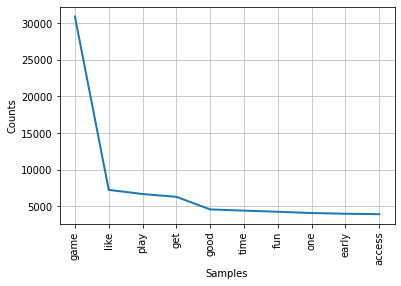

In [14]:
freq, all_rating_tokens = words_frequency(df, 'user_suggestion', 'ProcessTokens', 1)

[('game', 23714), ('play', 5105), ('like', 4795), ('time', 4427), ('good', 3012), ('access', 2963), ('early', 2915), ('money', 2892), ('fun', 2566), ('pay', 2379), ('new', 2264), ('want', 2099), ('people', 2095), ('way', 1685), ('free', 1644), ('bad', 1559), ('need', 1553), ('buy', 1530), ('better', 1513), ('lot', 1345)]


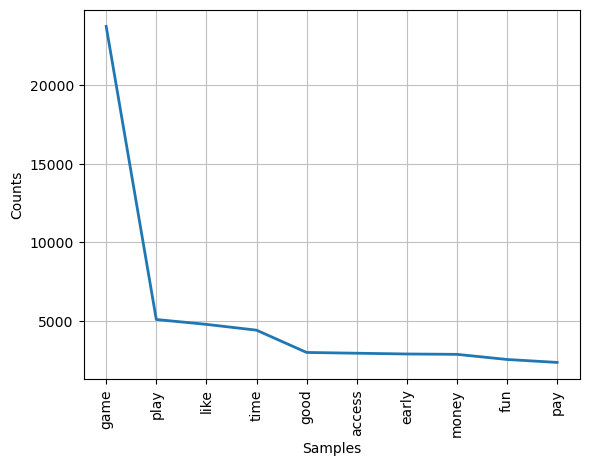

In [90]:
freq, all_rating_tokens = words_frequency(df, 'user_suggestion', 'ProcessTokens', 0)

In [118]:
#Converting thhe datatype of processtokens fromm list to string, so that our vectorization works right.
df['ProcessTokens'] = df['ProcessTokens'].astype("string")

<class 'str'>


In [114]:
#define text vectorizers (I used two different ones, later we can decide which one we should continue with)
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

In [154]:
#text vectorization with count_vectorizer
def create_vectorized_dataset_count(data):
    list_of_count_vectors = []
    data = data.tolist() # converting to a list
    count_vector = count_vectorizer.fit_transform(data)
    count_array = count_vector.toarray()
#     Uncomment the two lines below to see the count vector with feature names
#     probably might also need to remove print truncation to see the hwole thhing.
#     dftemp = pd.DataFrame(data=count_array,columns = count_vectorizer.get_feature_names())
#     print(dftemp)
    return count_array # this is the 2d 

count_vector = create_vectorized_dataset_count(df['ProcessTokens']) # this becomes our count vectorization vector.
# we can use thhis to train our model.


In [158]:
#text vectorization with tfidf_vectorizer
def create_vectorized_dataset_tfidf(data):
    data = data.tolist()
    tfidf_vector = tfidf_vectorizer.fit_transform(data)
    tfidf_array = tfidf_vector.toarray()
    dftemp = pd.DataFrame(data=tfidf_array, columns=tfidf_vectorizer.get_feature_names())
    print(dftemp)
    return tfidf_array

tfidf_vector = create_vectorized_dataset_tfidf(df['ProcessTokens'])
#df.head(1)

        aa  aback  abandon  abandoned  abdicate  abdication  abduct  \
0      0.0    0.0      0.0        0.0       0.0         0.0     0.0   
1      0.0    0.0      0.0        0.0       0.0         0.0     0.0   
2      0.0    0.0      0.0        0.0       0.0         0.0     0.0   
3      0.0    0.0      0.0        0.0       0.0         0.0     0.0   
4      0.0    0.0      0.0        0.0       0.0         0.0     0.0   
...    ...    ...      ...        ...       ...         ...     ...   
17489  0.0    0.0      0.0        0.0       0.0         0.0     0.0   
17490  0.0    0.0      0.0        0.0       0.0         0.0     0.0   
17491  0.0    0.0      0.0        0.0       0.0         0.0     0.0   
17492  0.0    0.0      0.0        0.0       0.0         0.0     0.0   
17493  0.0    0.0      0.0        0.0       0.0         0.0     0.0   

       abduction  aberration  abhor  ...  zippy  zodiac  zombi  zombie  zone  \
0            0.0         0.0    0.0  ...    0.0     0.0    0.0     

/Users/soumyankar/.pyenv/versions/miniconda3-latest/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


NOTE: use either Count_Vector or TF-IDF_Vectors column as the input for ML models

Next steps: 
1. define differnet ML models to work with
2. split the dataset (either Count_Vector or TF-IDF_Vectors) into training and testing data
3. fit the training data to the models
4. make predictions

Futher steps:

5. evaluate each model using different evaluation methods (use the testing dataset for this)